In [39]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import model
from model import header

In [40]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
from model import preprocess_X, preprocess_y, merge_sensors_3d_from_file, merge_sensors_from_file, get_dummy
X = []
y = []
for gestureName in os.listdir("data"):
    # get files in folder
    identifiers = set()
    for fileName in os.listdir(f"data\\{gestureName}"):
        identifier = fileName.split("_")[0]
        identifiers.add(identifier)
    for identifier in identifiers:
        X.append(merge_sensors_from_file(identifier, gestureName))
        y.append(gestureName)

X.extend(X)
y.extend(y)
X.extend(X)
y.extend(y)

X = preprocess_X(X)
y = preprocess_y(y)



print(len(X))
print(len(y))
X, y

700
700


(array([[[  1.3096284 ,   0.4141969 ,  11.243171  , ...,   3.69665059,
            4.03378083,   3.19412433],
         [  1.8267759 ,   8.810662  ,   0.62009823, ...,  10.84653121,
           13.64534049,   8.54261926],
         [  1.8962077 ,   8.765172  ,   0.6871359 , ...,   7.20101136,
            7.55436674,   3.35259141],
         ...,
         [  4.000711  ,   0.79966336,  -0.94810385, ...,   5.18456611,
            7.93899409,   7.52197105],
         [  4.000711  ,   0.79966336,  -0.94810385, ...,   5.18456611,
            7.93899409,   7.52197105],
         [  4.000711  ,   0.79966336,  -0.94810385, ...,   5.18456611,
            7.93899409,   7.52197105]],
 
        [[  0.6991069 ,   3.2944214 ,  14.628572  , ...,   8.63922887,
           10.71942252,   6.59011532],
         [  4.5322237 , -16.110582  ,   3.8307228 , ...,   1.28493333,
            1.65443775,   1.33201404],
         [  4.3766007 , -16.031574  ,   3.8881836 , ...,   1.3953375 ,
            1.64248392,   1.2160

In [38]:
# use sklearn to split dataset
from sklearn.model_selection import train_test_split

# split dataset into training and 'remaining data'
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, stratify=y)

# split remaining data into test and valid sets
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5, stratify=y_rem)
X_train.shape, X_valid.shape, X_test.shape

((490, 160, 21), (105, 160, 21), (105, 160, 21))

In [42]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool1D, LSTM, Bidirectional, MaxPooling2D, Conv1D
from model import labels

def create_model():
  model = tf.keras.Sequential()
  
  model.add(Conv1D(128, 3, input_shape=X.shape[1:]))
  model.add(Activation("relu"))
  model.add(MaxPool1D(pool_size=3))

  model.add(Conv1D(82, 3))
  model.add(Activation("relu"))
  model.add(MaxPool1D(pool_size=3))

  model.add(Conv1D(64, 3))
  model.add(Activation("relu"))
  model.add(MaxPool1D(pool_size=3))

  model.add(Flatten())
  model.add(Dense(64))

  model.add(Dense(len(labels)))
  model.add(Activation("softmax"))

  model.compile(optimizer='adam',
              loss = "categorical_crossentropy",
              metrics=['accuracy'])
  
  return model



# create convolution model
model = create_model()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 158, 128)          8192      
                                                                 
 activation_20 (Activation)  (None, 158, 128)          0         
                                                                 
 max_pooling1d_15 (MaxPooli  (None, 52, 128)           0         
 ng1D)                                                           
                                                                 
 conv1d_16 (Conv1D)          (None, 50, 82)            31570     
                                                                 
 activation_21 (Activation)  (None, 50, 82)            0         
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 16, 82)            0         
 ng1D)                                                

Epoch 1/100
8/8 - 2s - loss: 3.6188 - accuracy: 0.3163 - val_loss: 1.6401 - val_accuracy: 0.5238 - 2s/epoch - 207ms/step
Epoch 2/100
8/8 - 0s - loss: 1.2314 - accuracy: 0.5714 - val_loss: 1.0009 - val_accuracy: 0.6952 - 344ms/epoch - 43ms/step
Epoch 3/100
8/8 - 0s - loss: 0.7624 - accuracy: 0.7755 - val_loss: 0.6414 - val_accuracy: 0.8000 - 384ms/epoch - 48ms/step
Epoch 4/100
8/8 - 0s - loss: 0.4450 - accuracy: 0.8959 - val_loss: 0.3507 - val_accuracy: 0.9333 - 370ms/epoch - 46ms/step
Epoch 5/100
8/8 - 0s - loss: 0.2367 - accuracy: 0.9653 - val_loss: 0.2098 - val_accuracy: 0.9714 - 362ms/epoch - 45ms/step
Epoch 6/100
8/8 - 0s - loss: 0.1293 - accuracy: 0.9898 - val_loss: 0.1125 - val_accuracy: 0.9905 - 331ms/epoch - 41ms/step
Epoch 7/100
8/8 - 0s - loss: 0.0734 - accuracy: 0.9939 - val_loss: 0.0615 - val_accuracy: 0.9905 - 358ms/epoch - 45ms/step
Epoch 8/100
8/8 - 0s - loss: 0.0404 - accuracy: 0.9939 - val_loss: 0.0376 - val_accuracy: 0.9905 - 352ms/epoch - 44ms/step
Epoch 9/100
8/8 - 

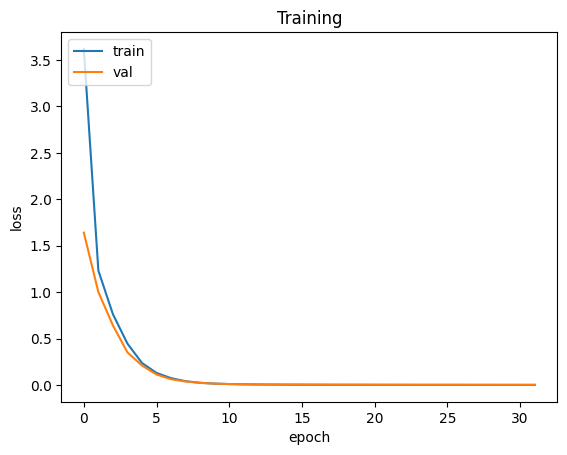

In [43]:
import datetime
def display_training_history(history, title):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title(title)
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=4, min_delta=0.0001)
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
checkpoint_path = f"checkpoints/{timestamp}/"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_weights_only=True, monitor='val_loss', mode='min',save_best_only=True)

train_history = model.fit(
    X_train, 
    y_train,
    epochs = 100,
    validation_data = (X_valid, y_valid),
    verbose = 2,
    callbacks=[early_stopping,checkpoint],
    batch_size=64)

model.load_weights(checkpoint_path)
display_training_history(train_history, "Training")

In [44]:
# create classification report
from sklearn.metrics import classification_report
from model import index_to_label
y_pred = model.predict(X_test)

pred_classes = [index_to_label[i] for i in np.argmax(y_pred, axis=1)]
true_classes = [index_to_label[i] for i in np.argmax(y_test, axis=1)]
print(classification_report(true_classes, pred_classes))

4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

   circle_in       1.00      1.00      1.00        16
  circle_out       1.00      1.00      1.00        18
        down       1.00      1.00      1.00        18
        left       1.00      1.00      1.00        18
       right       1.00      1.00      1.00        18
          up       1.00      1.00      1.00        17

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



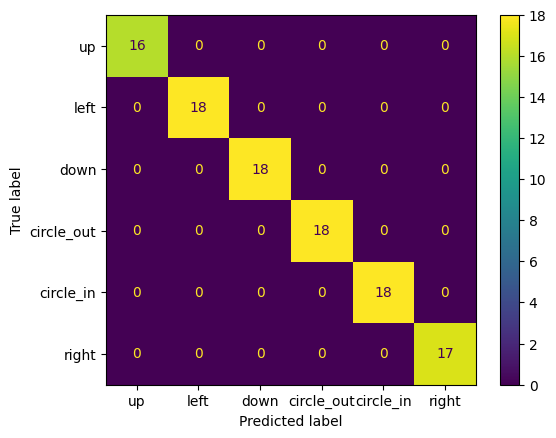

In [45]:
# create confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


matrix = confusion_matrix(pred_classes, true_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=set(pred_classes))
disp.plot()

In [46]:
import pickle
timestamp = pd.Timestamp.now().strftime("%Y%m%d%H%M%S")
file_name = f"saved_models/conv_{timestamp}.sav"
pickle.dump(model, open(file_name, 'wb'))
print(file_name)

saved_models/conv_20230814164104.sav
